In [15]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm, t, chi2

In [32]:
# whatever values
samplesize = 5
truemean = np.pi
truevariance = np.e

In [51]:
mean = []
variance = []

for i in range(10000):
    sample = np.random.normal(truemean, truevariance**.5, samplesize)

    mean.append(sample.mean())
    # sample.var() return the biased sample variance
    # unless ddof=1 (degrees of freedom = 1)
    variance.append(sample.var(ddof=1))

mean = np.array(mean)
variance = np.array(variance)

Text(0.5,1,'Standard Normal distribution')

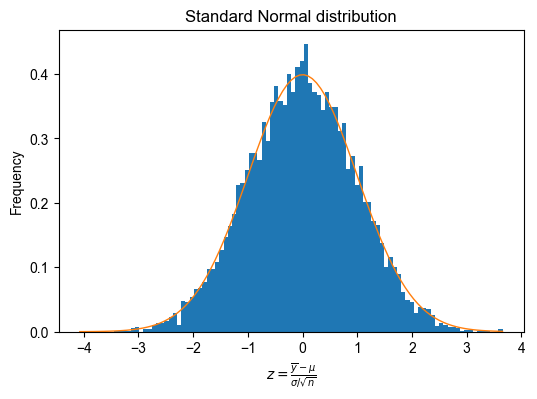

In [52]:
fig, ax = plt.subplots(dpi=100)
z = (mean - truemean)/(truevariance/samplesize)**.5
y, x, patches = ax.hist(z, bins=100, density=True)
ax.plot(x, norm.pdf(x))
ax.set_xlabel(r'$z = \frac{\overline{y} - \mu}{\sigma / \sqrt{n}}$')
ax.set_ylabel('Frequency')
ax.set_title('Standard Normal distribution')

Text(0.5,1,"Student's t-distribution - 4 degrees of freedom")

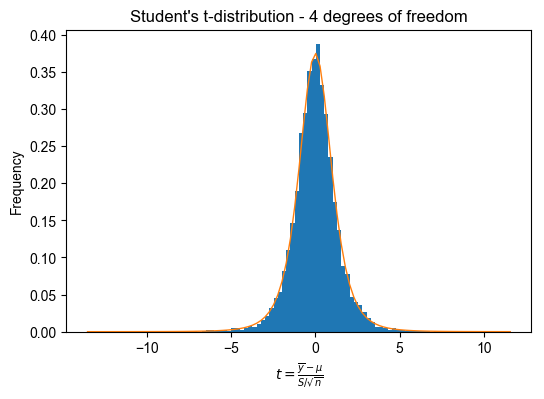

In [55]:
fig, ax = plt.subplots(dpi=100)
z = (mean - truemean)/(variance/samplesize)**.5
y, x, patches = ax.hist(z, bins=100, density=True)
ax.plot(x, t.pdf(x, df=samplesize - 1))
ax.set_xlabel(r'$t = \frac{\overline{y} - \mu}{S / \sqrt{n}}$')
ax.set_ylabel('Frequency')
ax.set_title(('Student\'s t-distribution - '
              '{} degrees of freedom').format(samplesize - 1))

Text(0.5,1,'$\\chi^2$ distribution - 4 degrees of freedom')

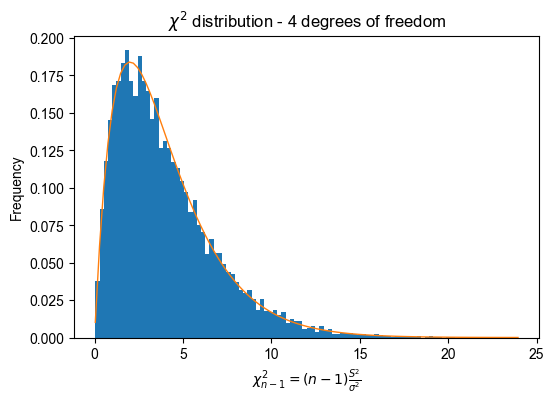

In [56]:
fig, ax = plt.subplots(dpi=100)
z = variance*(samplesize - 1)/truevariance
y, x, patches = ax.hist(z, bins=100, density=True)
ax.plot(x, chi2.pdf(x, df=samplesize - 1))
ax.set_xlabel(r'$\chi^2_{n-1} = (n-1)\frac{S^2}{\sigma^2}$')
ax.set_ylabel('Frequency')
ax.set_title((r'$\chi^2$ distribution - '
              '{} degrees of freedom').format(samplesize - 1))
